# Mastering Metrics Chapter 4
## Regression Discontinuity
Use RD when we don't have random assignment, but where some change occurs due to our 'running variable'.

MLDA study - Maximum Legal Drinking Age study

$D_a$ = 1 if age >= 21 else 0

Term | Definition
-|-
Running Variable | variable which determines treatment (age in this case)
Sharp RD | Treatment switches on and off immediately (e.g. in this case, at the 21st birthday)
Fuzzy RD | Treatment becomes stronger or more likely at some cutoff


### Regression setup:
$$\bar{M_a} = \alpha + \rho D_a + \gamma a + e_a$$

In example:

$\bar{M_a}$ : Death rate in month a


In [1]:
%matplotlib inline
import numpy as np
np.random.seed(100)

#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Create some death rate data:
x_axis = np.arange(-100, 100)

#If positive:  20*U - 0.01x
#If negative:  10*U - 0.01x
y_axis = list(map(lambda x : int(abs(np.random.normal(40 + 10*(x>0), 8)) - 0.01 * x), x_axis))

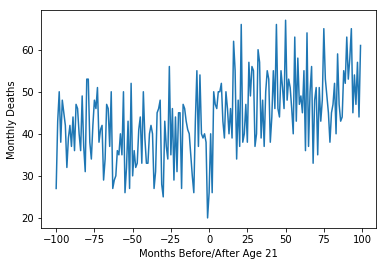

In [2]:
plt.plot(x_axis, y_axis)
plt.xlabel("Months Before/After Age 21")
plt.ylabel("Monthly Deaths")

## Regression Discontinuity:
$$\bar{M_a} = \alpha + \rho D_a + \gamma a + e_a$$

In [3]:
#Set up variables
M_a = y_axis
D_a = x_axis >= 0
a = x_axis

#Massage data into DF:
in_df = pd.DataFrame(data = {"D_a" : D_a,
                              "a" : a,
                              "M_a" : M_a},
                    index = a)

In [5]:
#Create Regression Objects
import statsmodels.api as sm
y = in_df["M_a"]
X = in_df[["D_a", "a"]].astype(float)
X.head()

,D_a,a
-100,0.0,-100.0
-99,0.0,-99.0
-98,0.0,-98.0
-97,0.0,-97.0
-96,0.0,-96.0


In [6]:
X['const'] = 1.0

lr = sm.OLS(y, X)
result = lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M_a   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     31.16
Date:                Mon, 20 Feb 2017   Prob (F-statistic):           1.74e-12
Time:                        16:34:59   Log-Likelihood:                -705.22
No. Observations:                 200   AIC:                             1416.
Df Residuals:                     197   BIC:                             1426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
D_a            6.7717      2.344      2.889      0.004       2.149      11.394
a              0.0238      0.020      1.172      0.243      -0.016       0.064
const         40.4211      1.318     30.662      0.000      37.821      43.021
==============================================================================
Omnibus:                        1.479   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                1.297
Skew:                          -0.007   Prob(JB):                        0.523
Kurtosis:                       2.606   Cond. No.                         260.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

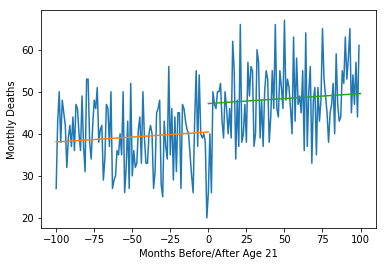

In [7]:
#Plot the regressions:
#Base data
plt.plot(x_axis, y_axis)
plt.xlabel("Months Before/After Age 21")
plt.ylabel("Monthly Deaths")

#Regressions:

#PRE
plt.plot([-100, 0], [result.predict([0, -100, 1]), result.predict([0, 0, 1])])
#POST
plt.plot([0, 100], [result.predict([1, 0, 1]), result.predict([1, 100, 1])])

### Limitiations:
One limitation is that we have to assume the relationship is linear (or polynomial if we are fitting a poly regression). If our assumption is wrong, we will misjudge the discontinuity.